# CMBD on our data

In [ ]:
import sys
module_path = r"../src"
module_path_lib = r"../lib"
sys.oath.append(module_path)
sys.oath.append(module_path_lib)


import CMBD.ConwayMaxwellBinomial as cmb
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from pathlib import Path

In [3]:
def exact_pmf_cdf(dist, xs):
    """Return PMF and CDF arrays for the given COM-B distribution over xs."""
    pmf = np.array([dist.pmf(k) for k in xs], dtype=float)
    pmf = pmf / pmf.sum() # guard against tiny drift
    cdf = np.cumsum(pmf)
    return pmf, cdf


datasets = [
    {'Dx': 'control', 'method': 'soremps', 'dataset': 'NSRR', 'nights': 2, 'outcomes': [0]*4580 + [1]*(72+76) + [2]*4},
    {'Dx': 'control', 'method': 'multi', 'dataset': 'NSRR', 'nights': 2, 'outcomes': [0]*4625 + [1]*(59+44) + [2]*4},

    {'Dx': 'NT1', 'method': 'soremps', 'dataset': 'TAK-all', 'nights': 2, 'outcomes': [0]*16 + [1]*(3+4) + [2]*5},
    {'Dx': 'NT1', 'method': 'multi', 'dataset': 'TAK-all', 'nights': 2, 'outcomes': [0]*13 + [1]*6 + [2]*8},

    {'Dx': 'NT1', 'method': 'soremps', 'dataset': 'comb', 'nights': 2, 'outcomes': [0]*43 + [1]*(52+19) + [2]*37},
    {'Dx': 'NT1', 'method': 'multi', 'dataset': 'comb', 'nights': 2, 'outcomes': [0]*38 + [1]*(20+43) + [2]*50},

    # Trying new approaches
    {'Dx': 'NT1', 'method': 'multi', 'dataset': 'comb', 'nights': 3, 'outcomes': [0]*5 + [1]*6 + [2]*3 + [3]*4},
    {'Dx': 'NT1', 'method': 'multi', 'dataset': 'comb', 'nights': 2, 'outcomes': [0]*9 + [1]*9 + [2]*12},
    
    #{'Dx': 'NT1', 'method': 'MSLT', 'dataset': 'MSLT', 'nights': 2, 'outcomes': [0]*10 + [1]*20 + [2]*47},
]

approach3es_1 = [
    #{'name': "SOREMP", "Control": (0.0287044, 0.12888857), "NT1": (0.35857011, -0.35)},
    #{'name': "MULTI", "Control": (0.02856839, -0.40111661), "NT1": (0.4396078,  -0.44)},
    #{'name': "SOREMP_1", "Control": (0.02856839, -0.40111661), "NT1": (0.48, 0.83)},
    #{'name': "MULTI_1", "Control": (0.02856839, -0.40111661), "NT1": (0.53, 0.53)},
    
    {'name': 'MULTI_2', 'Control': (0.02856839, -0.40111661), 'NT1': (0.458, 0.065)},
    {'name': 'MULTI_3', 'Control': (0.02856839, -0.40111661), 'NT1': (0.537, -0.228)},
    # {'name': 'MSLT', 'Control': (0.02856839, -0.40111661), 'NT1': (0.684, -0.116)},

]

approaches_2 = [
    {
        'name': 'Multi-feature',
        'datasets': [
            {'Dx': 'control', 'method': 'multi', 'dataset': 'NSRR', 'nights': 2, 'outcomes': [0]*4601 + [1]*(122) + [2]*9},
            #{'Dx': 'NT1', 'method': 'multi', 'dataset': 'comb', 'nights': 3, 'outcomes': [0]*5 + [1]*6 + [2]*3 + [3]*4},
            {'Dx': 'NT1', 'method': 'multi', 'dataset': 'comb', 'nights': 2, 'outcomes': [0]*9 + [1]*9 + [2]*12} # + [3]*4},
        ]
    }, 
    {
        'name': 'Multi-feature - 3 nights',
        'datasets': [
            {'Dx': 'control', 'method': 'multi', 'dataset': 'NSRR', 'nights': 2, 'outcomes': [0]*4601 + [1]*(122) + [2]*9},
            {'Dx': 'NT1', 'method': 'multi', 'dataset': 'comb', 'nights': 3, 'outcomes': [0]*6 + [1]*6 + [2]*2 + [3]*4},
        ]
    }, 
    {
        'name': 'SOREMP',
        'datasets': [
            {'Dx': 'control', 'method': 'soremps', 'dataset': 'NSRR', 'nights': 2, 'outcomes': [0]*4580 + [1]*(72+76) + [2]*4},
            {'Dx': 'NT1', 'method': 'soremps', 'dataset': 'TAK-all', 'nights': 2, 'outcomes': [0]*14 + [1]*(11) + [2]*5},
        ]
    }, 

]


In [4]:
from tqdm.auto import tqdm

# parameters
recordings = 14
df_1 = pd.DataFrame()
realizations = 100000

for approach in approaches_2:
    for dataset in approach['datasets']:
        # estimate parameters
        p_est, nu_est = cmb.estimateParams(dataset.get('nights'), np.asarray(dataset.get('outcomes')))

        for recording in range(1, recordings+1):
            cmbd_dist = cmb.ConwayMaxwellBinomial(p_est,  nu_est,  recording) # Build COM-B distribution
            samples = cmbd_dist.rvs(size=realizations).tolist() # Sample from distribution
            #pmf, cdf = exact_pmf_cdf(dist_con, n_pos_recs)
        
            # append to dataframe
            df_new = pd.DataFrame.from_dict({
                'approach': approach['name'],
                'Dx': dataset.get('Dx'),
                'method': dataset.get('method'),
                'dataset': dataset.get('dataset'),
                'n_recs': recording, 
                'n_pos_recs': samples,
            })
            df_1 = pd.concat([df_1, df_new], ignore_index=True)
            
print(df_1.shape)
df_1.head()
# df_1[['Dx', 'n_pos_recs']].value_counts().unstack().T

/opt/anaconda3/envs/nt1-wearable-sim/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(8400000, 6)


,approach,Dx,method,dataset,n_recs,n_pos_recs
0,Multi-feature,control,multi,NSRR,1,0
1,Multi-feature,control,multi,NSRR,1,0
2,Multi-feature,control,multi,NSRR,1,0
3,Multi-feature,control,multi,NSRR,1,0
4,Multi-feature,control,multi,NSRR,1,0


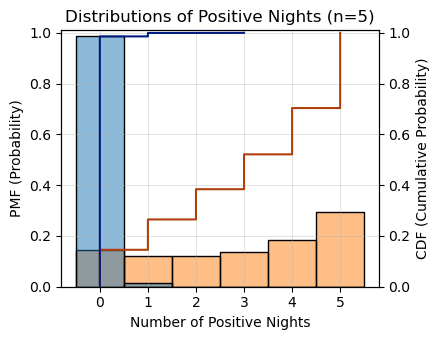

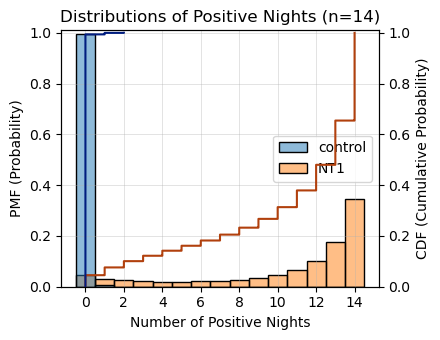

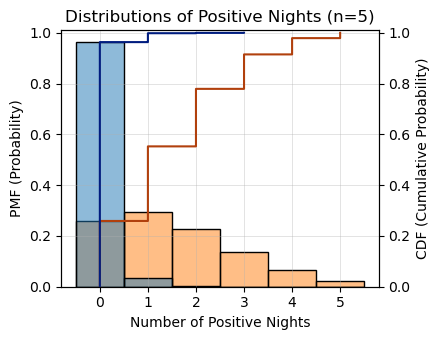

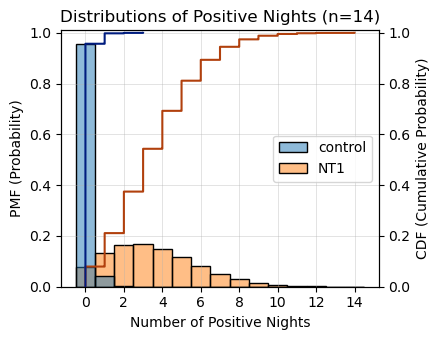

In [ ]:
# parameters
x = 'n_pos_recs'
n_recs_all = [5, 14]
#kwargs = {'bins': range(0, 2)} if len(df_1[x].unique()) == 1 else {'binwidth': 1}

for approach in ['Multi-feature', 'SOREMP']:
    for i, n_recs in enumerate(n_recs_all):
    
        # filter data
        df_ = df_1.query("(approach == @approach) & (n_recs == @n_recs)").copy()
        
        # figure
        fig, ax = plt.subplots(1, 1, figsize=(4.5, 3.5))

        sns.histplot(
            data=df_,
            x=x,
            hue='Dx',
            hue_order=['control', 'NT1'],
            ax=ax,
            stat='probability',  # normalize
            common_norm=False,   # don't normalize across all hue groups
            multiple='layer',    # side-by-side bars like countplot
            #shrink=0.95,          # optional: shrink bar width for spacing
            discrete=True        # ensure bars don't overlap if feature is discrete
            #**kwargs
        )

        ax.set_xlabel("Number of Positive Nights")
    
        ax.set_ylabel("PMF (Probability)")
        ax.set_title(f"Distributions of Positive Nights (n={n_recs})")
        ax.set_ylim(0, 1.01)
        # ax.grid(True, alpha=0.3)
        ax.grid(True, which='major', axis='both', linestyle='-', linewidth=0.5, alpha=0.5)

        # xticks
        max_ticks = 8
        xticks = np.linspace(0, n_recs, num=min(max_ticks, n_recs+1), dtype=int)
        ax.set_xticks(xticks)

        ax2 = ax.twinx()
        sns.ecdfplot(
        data=df_,
        x='n_pos_recs',
        hue='Dx',
        hue_order=['control', 'NT1'],
        ax=ax2,
        palette='dark'
        )
        
        ax2.set_ylabel("CDF (Cumulative Probability)")
        ax2.set_ylim(0, 1.01)
        ax2.grid(False)
        
        # Legends: keep only one combined legend on the right-most panel
        leg1 = ax.get_legend()
        if leg1:
            if i == len(n_recs_all) - 1:
                leg1.set_title(None)
                leg1.set_loc("center right")
            else:
                leg1.remove()

        leg2 = ax2.get_legend()
        if leg2:
            leg2.remove()

        plt.tight_layout() 
        

In [21]:
def compute_confusion_matrix(y_true, y_pred, prevalence=1/1024):
    tp = round(((y_pred == 1) & (y_true == 1)).sum() * prevalence)
    tn = round(((y_pred == 0) & (y_true == 0)).sum() * (1 - prevalence))
    fp = round(((y_pred == 1) & (y_true == 0)).sum() * (1 - prevalence))
    fn = round(((y_pred == 0) & (y_true == 1)).sum() * prevalence)
    
    return tp, tn, fp, fn

def compute_metrics(y_true, y_pred, prevalence):

    tp, tn, fp, fn = compute_confusion_matrix(y_true=y_true, y_pred=y_pred, prevalence=prevalence)
    
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else np.nan
    specificity = tn / (tn + fp) if (tn + fp) > 0 else np.nan
    ppv = tp / (tp + fp) if (tp + fp) > 0 else np.nan
    fp_tp_ratio = fp / tp if tp > 0 else np.inf
    f1 = 2 * (ppv * sensitivity) / (ppv + sensitivity) if (ppv + sensitivity) > 0 else np.nan
    
    return {'Sensitivity': sensitivity, 'Specificity': specificity, 'PPV': ppv, 'FP:TP': fp_tp_ratio, 'F1 score': f1}



In [10]:
# parameters
prevalence=1/2048  # TODO - update prevalence
thresholds = [1, 2, 3, 4, 5]

metrics = []
for approach in ['Multi-feature', 'SOREMP']:
    for n_rec in range(1, recordings+1):
        # filter data
        df_ = df_1.query("(approach == @approach) & (n_recs == @n_rec)").copy()
        y = df_['Dx'].map({'control': 0, 'NT1': 1}).values
        
        for thresh in thresholds:
            
            # apply threshold
            p_bin = (df_['n_pos_recs'].values >= thresh).astype(int)
            
            # compute metrics
            metrics.append({
                'approach': approach,
                'Recordings (n)': n_rec,
                'Min. required positive (n)': thresh,
                **compute_metrics(y_true=y, y_pred=p_bin, prevalence=prevalence)
            })

df_metrics = pd.DataFrame(metrics)
df_metrics.head(28)


NameError: name 'compute_metrics' is not defined

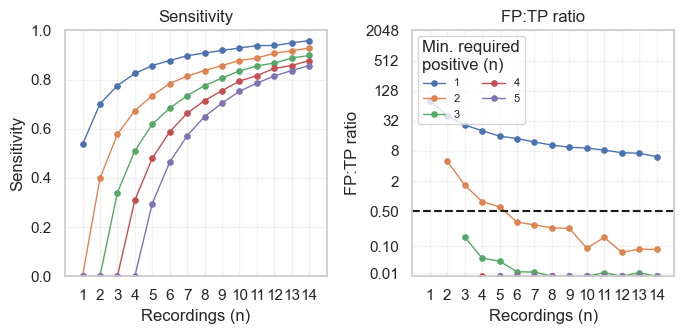

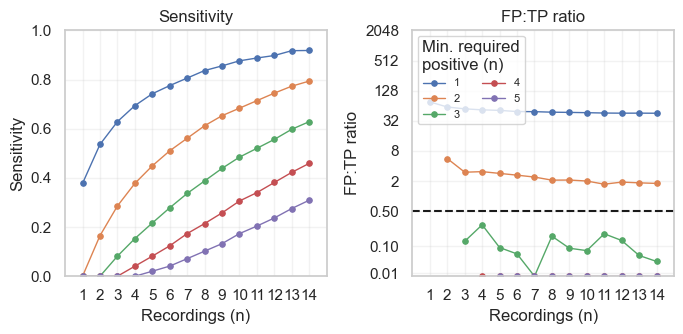

In [ ]:
for approach in ['Multi-feature', 'SOREMP']:

    df_ = df_metrics.query("approach == @approach").copy()

    # Create plots
    fig, axes = plt.subplots(ncols=2, figsize=(7, 3.5))

    # Sensitivity plot
    sns.pointplot(data=df_, hue='Min. required positive (n)', y='Sensitivity', x='Recordings (n)', palette='deep', ax=axes[0], markers='o', ms=4, lw=1)
    axes[0].set_title('Sensitivity')
    axes[0].set_ylabel('Sensitivity')
    axes[0].grid(True, alpha=0.25)
    axes[0].set_ylim([0, 1])
    axes[0].set_xlim([-1, recordings])
    axes[0].legend().remove()

    # FP:TP Ratio plot
    sns.pointplot(data=df_, hue='Min. required positive (n)', y='FP:TP', x='Recordings (n)', palette='deep', ax=axes[1], markers='o', ms=4, lw=1)
    axes[1].set_title('FP:TP ratio')
    axes[1].set_ylabel('FP:TP ratio')
    axes[1].grid(True, alpha=0.25)
    # axes[1].axhline(y=max_FPTP, color='black', linestyle='--', label='Max FP:TP')

    ticks = [0.01, 0.1, 0.5, 2, 8, 32,  128,  512, 2048]
    axes[1].set_yscale('symlog', base=2, linthresh=0.1)
    axes[1].set_ylim([0, 2e3])
    axes[1].set_xlim([-1, recordings])
    axes[1].set_yticks(ticks)
    axes[1].set_yticklabels([f'{tick:.2f}' if tick < 1 else f'{tick}' for tick in ticks])
    axes[1].legend().remove()
    axes[1].axhline(0.5, ls='--', color='k')
    axes[1].legend(title='Min. required\npositive (n)', loc='upper left', ncols=2, fontsize=8)

    # F1 score plot
    # sns.pointplot(data=df_, hue='Min. required positive (n)', y='F1 score', x='Recordings (n)', palette='deep', ax=axes[2], markers='o', ms=4, lw=1)
    # # axes[2].set_title(f'F1 score (FP:TP < {max_FPTP:.1f})')
    # axes[2].set_ylabel('F1 score')
    # axes[2].grid(True, alpha=0.25)
    # axes[2].set_ylim([0, 1])
    # axes[2].set_xlim([-1, recordings])
    # axes[2].legend().remove()
    # axes[2].legend(title='Min. required positive (n)', loc='upper left', ncols=2, fontsize=8)

    plt.tight_layout()